In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv('titanic_modif.csv')
df.head()

FileNotFoundError: ignored

In [ ]:
# memeriksa tipe data pada setiap kolom, inkonsistensi tipe data juga bisa di kenali dengan adanya tipe data "object"

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   gender      891 non-null    object 
 2   age         714 non-null    float64
 3   sibsp       891 non-null    int64  
 4   parch       891 non-null    int64  
 5   fare        891 non-null    float64
 6   embarked    889 non-null    object 
 7   class       891 non-null    object 
 8   who         891 non-null    object 
 9   adult_male  891 non-null    bool   
 10  deck        203 non-null    object 
 11  alone       891 non-null    bool   
dtypes: bool(2), float64(2), int64(3), object(5)
memory usage: 71.5+ KB


## Handling Missing Value

In [ ]:
# memeriksa data null masing2 kolom

print(df.shape)
df.isnull().sum()

(891, 12)


survived        0
gender          0
age           177
sibsp           0
parch           0
fare            0
embarked        2
class           0
who             0
adult_male      0
deck          688
alone           0
dtype: int64

Handle :
- Data yang missing > 60%
menghapus kolom tersebut
- Data kategorik
mengisi dengan kategori terbanyak
mengisi dengan 'other' atau 'lain-lain'
- Data numerik
mengisi dengan rata-rata atau median
mengisi dengan nilai 0


In [ ]:
# handling dengan menghapus kolom 
# kolom Deck memiliki missing value yang sangat banyak

df = df.drop(columns='deck')
df.isnull().sum()

survived        0
gender          0
age           177
sibsp           0
parch           0
fare            0
embarked        2
class           0
who             0
adult_male      0
alone           0
dtype: int64

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# handling dengan menghapus baris
# kolom embarked hanya memiliki 2 null value, sehingga masih bisa kita hapus datanya karena tidak terlalu berpengaruh

df.dropna(subset=['embarked'], inplace=True)
df.isnull().sum()

survived        0
gender          0
age           177
sibsp           0
parch           0
fare            0
embarked        0
class           0
who             0
adult_male      0
alone           0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


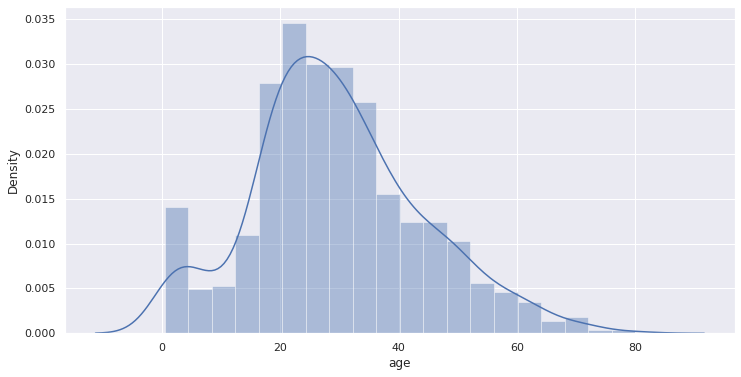

In [ ]:
plt.figure(figsize=(12,6))
sns.set_theme()
sns.distplot(df['age'])
plt.show()

jika dilihat dari distribusi data umur, data ini memiliki distribusi yang tidak normal. sebaran mengalami left skew, dan kemungkinan ada outlier pada umur yang lebih besar

perlu diperhatikan ketika akan mengisi null value menggunakan "mean" karena jika data tidak berdistribusi normal, maka tidak disarankan untuk pengisian null value menggunakan "mean" dikarenakan nilai "mean" akan bergeser dipengaruhi nilai outlier sehingga nilai "mean" tidak mewakili keseluruhan data.

jika distribusi data tidak normal, lebih baik menggunakan median / modus, karena nilainya lebih tahan terhadap adanya outlier, sehingga lebih bisa mewakili keseluruhan data.

In [ ]:
# Handling Missing Value dengan Modus / median

df['age'].fillna(df['age'].median(), inplace = True)
df.isnull().sum()

survived      0
gender        0
age           0
sibsp         0
parch         0
fare          0
embarked      0
class         0
who           0
adult_male    0
alone         0
dtype: int64

## Cek Duplikasi Data

In [ ]:
print('Total Data Duplikat', df.duplicated().sum())
df[df.duplicated()]

Total Data Duplikat 116


,survived,gender,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
47,1,female,28.0,0,0,7.7500,Q,Third,woman,False,True
55,1,male,28.0,0,0,35.5000,S,First,man,True,True
76,0,male,28.0,0,0,7.8958,S,Third,man,True,True
77,0,male,28.0,0,0,8.0500,S,Third,man,True,True
87,0,male,28.0,0,0,8.0500,S,Third,man,True,True
...,...,...,...,...,...,...,...,...,...,...,...
870,0,male,26.0,0,0,7.8958,S,Third,man,True,True
877,0,male,19.0,0,0,7.8958,S,Third,man,True,True
878,0,male,28.0,0,0,7.8958,S,Third,man,True,True
884,0,male,25.0,0,0,7.0500,S,Third,man,True,True


In [ ]:
# Cara 1 menghilangkan data duplikat menggunakan conditional slicing

df_unique = df[~df.duplicated()]
print('Total Data Duplikat', df_unique.duplicated().sum())

Total Data Duplikat 0


In [ ]:
# Cara 2 menghilangkan data duplikat menggunakan fungsi drop_duplicates

df_unique = df.drop_duplicates()
print('Total Data Duplikat', df_unique.duplicated().sum())

Total Data Duplikat 0


## Feature Encoding

Feature encoding adalah proses mengubah feature kategorik menjadi numerik. Metode Machine Learning hanya bisa diimplementasikan dalam komputasi numerik.

Yang sering digunakan :
- One-Hot-Encoder (untuk data nominal)
- Label Encoder (untuk data ordinal)

In [ ]:
df_encode = df.copy()

### Encoding Data Nominal

- Data Nominal = ['gender','who','embarked']

In [ ]:
# Cara 1 untuk One Hot Encoding

encoded_columns = pd.get_dummies(df_encode['gender'])
df_encode = pd.concat([df_encode,encoded_columns], axis=1)

,survived,age,sibsp,parch,fare,embarked,class,who,adult_male,alone,female,male
0,0,22.0,1,0,7.2500,S,Third,man,True,False,0,1
1,1,38.0,1,0,71.2833,C,First,woman,False,False,1,0
2,1,26.0,0,0,7.9250,S,Third,woman,False,True,1,0
3,1,35.0,1,0,53.1000,S,First,woman,False,False,1,0
4,0,35.0,0,0,8.0500,S,Third,man,True,True,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,13.0000,S,Second,man,True,True,0,1
887,1,19.0,0,0,30.0000,S,First,woman,False,True,1,0
888,0,28.0,1,2,23.4500,S,Third,woman,False,False,1,0
889,1,26.0,0,0,30.0000,C,First,man,True,True,0,1


In [ ]:
encoded_columns = pd.get_dummies(df_encode['who'])
df_encode = pd.concat([df_encode,encoded_columns], axis=1)
df_encode.head()

,survived,gender,age,sibsp,parch,fare,embarked,class,who,adult_male,alone,female,male,child,man,woman
0,0,male,22.0,1,0,7.2500,S,Third,man,True,False,0,1,0,1,0
1,1,female,38.0,1,0,71.2833,C,First,woman,False,False,1,0,0,0,1
2,1,female,26.0,0,0,7.9250,S,Third,woman,False,True,1,0,0,0,1
3,1,female,35.0,1,0,53.1000,S,First,woman,False,False,1,0,0,0,1
4,0,male,35.0,0,0,8.0500,S,Third,man,True,True,0,1,0,1,0


In [ ]:
# Cara 2 untuk one hot encoder

from sklearn.preprocessing import OneHotEncoder

# Membuat Object OneHotEncoder dengan kategori yang disesuaikan dengan isi unique dari kolom
# lalu object digunakan untuk fit kemudian transform
ohe = OneHotEncoder(categories=[list(df_encode.embarked.unique())], handle_unknown='ignore', sparse=False)
y = np.array(df_encode['embarked']).reshape(-1,1)
ohe.fit(y)
y_transform = ohe.transform(y)

# Membuat kolom baru untuk menampung hasil encoding 
df_encode[[ f'embark_{embark}' for embark in df_encode.embarked.unique() ]] = y_transform
df_encode.head()

,survived,gender,age,sibsp,parch,fare,embarked,class,who,adult_male,alone,female,male,child,man,woman,embark_S,embark_C,embark_Q
0,0,male,22.0,1,0,7.2500,S,Third,man,True,False,0,1,0,1,0,1.0,0.0,0.0
1,1,female,38.0,1,0,71.2833,C,First,woman,False,False,1,0,0,0,1,0.0,1.0,0.0
2,1,female,26.0,0,0,7.9250,S,Third,woman,False,True,1,0,0,0,1,1.0,0.0,0.0
3,1,female,35.0,1,0,53.1000,S,First,woman,False,False,1,0,0,0,1,1.0,0.0,0.0
4,0,male,35.0,0,0,8.0500,S,Third,man,True,True,0,1,0,1,0,1.0,0.0,0.0


In [ ]:
# jika sudah selesai, hapus kolom awal sebelum di encode

df_encode.drop(columns=['gender','embarked','who'], inplace=True)
df_encode.head()

,survived,age,sibsp,parch,fare,class,adult_male,alone,female,male,child,man,woman,embark_S,embark_C,embark_Q
0,0,22.0,1,0,7.2500,Third,True,False,0,1,0,1,0,1.0,0.0,0.0
1,1,38.0,1,0,71.2833,First,False,False,1,0,0,0,1,0.0,1.0,0.0
2,1,26.0,0,0,7.9250,Third,False,True,1,0,0,0,1,1.0,0.0,0.0
3,1,35.0,1,0,53.1000,First,False,False,1,0,0,0,1,1.0,0.0,0.0
4,0,35.0,0,0,8.0500,Third,True,True,0,1,0,1,0,1.0,0.0,0.0


### Encoding Data Ordinal

data ordinal = ['class']

In [ ]:
#Label encoder
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder( categories=[['First','Second','Third']] )

#ubah dulu sebagai array
y = np.array(df_encode['class']).reshape(-1,1)
ordinal_encoder.fit(y)
df_encode['class_encode'] = ordinal_encoder.transform(y)
df_encode.head()

,survived,age,sibsp,parch,fare,class,adult_male,alone,female,male,child,man,woman,embark_S,embark_C,embark_Q,class_encode
0,0,22.0,1,0,7.2500,Third,True,False,0,1,0,1,0,1.0,0.0,0.0,2.0
1,1,38.0,1,0,71.2833,First,False,False,1,0,0,0,1,0.0,1.0,0.0,0.0
2,1,26.0,0,0,7.9250,Third,False,True,1,0,0,0,1,1.0,0.0,0.0,2.0
3,1,35.0,1,0,53.1000,First,False,False,1,0,0,0,1,1.0,0.0,0.0,0.0
4,0,35.0,0,0,8.0500,Third,True,True,0,1,0,1,0,1.0,0.0,0.0,2.0


In [ ]:
# jika encoding selesai, hapus kolom awal sebelum encoding

df_encode.drop(columns=['class'], inplace=True)
df_encode.head()

,survived,age,sibsp,parch,fare,adult_male,alone,female,male,child,man,woman,embark_S,embark_C,embark_Q,class_encode
0,0,22.0,1,0,7.2500,True,False,0,1,0,1,0,1.0,0.0,0.0,2.0
1,1,38.0,1,0,71.2833,False,False,1,0,0,0,1,0.0,1.0,0.0,0.0
2,1,26.0,0,0,7.9250,False,True,1,0,0,0,1,1.0,0.0,0.0,2.0
3,1,35.0,1,0,53.1000,False,False,1,0,0,0,1,1.0,0.0,0.0,0.0
4,0,35.0,0,0,8.0500,True,True,0,1,0,1,0,1.0,0.0,0.0,2.0


## Handling Outliers

Outliers adalah nilai yang menyimpang pada dataset. Bisa terjadi karena kesalahan manusia, kesalahan perhitungan, kesalahan transformasi, dll. Outlier juga memungkinkan merupakan data natural.

In [ ]:
df_copy = df_encode.copy()

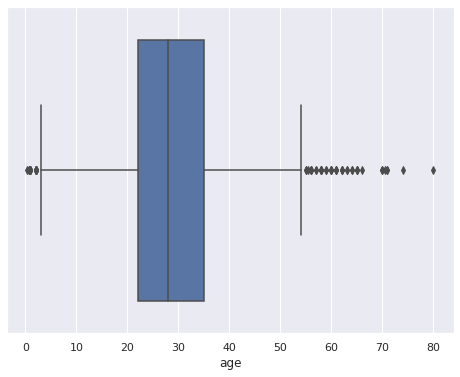

In [ ]:
# mendeteksi outlier paling mudah adalah dengan menggunakan boxplot

plt.figure(figsize=(8,6))
sns.boxplot(x=df_copy['age'])

In [ ]:
# pada kasus data umur ini, outlier di sisi atas data akan diubah ke nilai threshold atas

# handling outliers using IQR

q1 = df_copy['age'].quantile(.25)
q3 = df_copy['age'].quantile(.75)
iqr = q3-q1

df_copy['age'] = df_copy['age'].mask(((df_copy['age'] > (q3+(1.5*iqr)))), (q3+(1.5*iqr)))
df_copy.head()

,survived,age,sibsp,parch,fare,adult_male,alone,female,male,child,man,woman,embark_S,embark_C,embark_Q,class_encode
0,0,22.0,1,0,7.2500,True,False,0,1,0,1,0,1.0,0.0,0.0,2.0
1,1,38.0,1,0,71.2833,False,False,1,0,0,0,1,0.0,1.0,0.0,0.0
2,1,26.0,0,0,7.9250,False,True,1,0,0,0,1,1.0,0.0,0.0,2.0
3,1,35.0,1,0,53.1000,False,False,1,0,0,0,1,1.0,0.0,0.0,0.0
4,0,35.0,0,0,8.0500,True,True,0,1,0,1,0,1.0,0.0,0.0,2.0


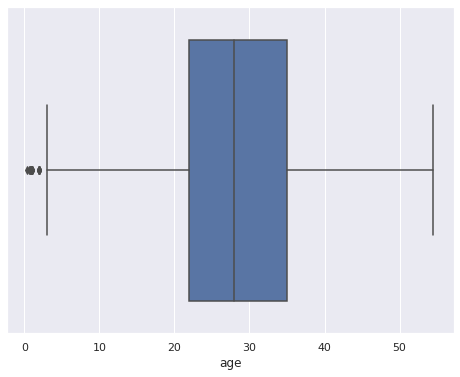

In [ ]:
# periksa kembali outlier setelah dibersihkan

plt.figure(figsize=(8,6))
sns.boxplot(x=df_copy['age'])

## Split Data

sebelum masuk ke tahap modelling, data harus di bagi dalam set data latih (train data) dan data uji (data tes), dengan proporsi yang dapat ditentukan sesuai kebutuhan, misal 8:2, 7:3 dsb

In [ ]:
X = df_encode.drop(columns=['survived'])
y = df_encode['survived']

In [ ]:
# split data dengan proporsi 80:20

from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(X,y, test_size=0.2, random_state=123)

## Feature Scaling

Feature scaling adalah proses transformasi nilai dari data menjadi skala tertentu

Kegunaan Feature Scaling:
- Mempercepat algoritma
- Mempermudah interpretasi beberapa model Machine Learning
- Meningkatkan performa model


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Object Scaling / Normalisasi hanya di fit ke data training

scaler = MinMaxScaler()
columns = list(X_train.columns)
scaler.fit(X_train[columns])

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# jika ingin tetap dalam bentuk dataframe, nilai hasil scaling dapat di assign ke kolom awal
X_train[columns] = X_train_scaled
X_test[columns] = X_test_scaled

In [ ]:
X_train.head()

,age,sibsp,parch,fare,adult_male,alone,female,male,child,man,woman,embark_S,embark_C,embark_Q,class_encode
222,0.635587,0.00,0.0,0.015713,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
330,0.346569,0.25,0.0,0.045381,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
749,0.384267,0.00,0.0,0.015127,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
204,0.220910,0.00,0.0,0.015713,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
422,0.359135,0.00,0.0,0.015371,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


## Handling Class Imbalance

Text(0.5, 1.0, 'Perbandingan Class Survived')

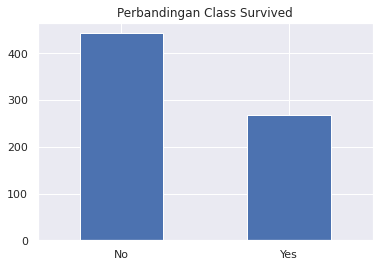

In [ ]:
y_train.value_counts().plot(kind='bar')
plt.xticks([0,1],['No','Yes'], rotation=0)
plt.title('Perbandingan Class Survived')

In [ ]:
from imblearn.over_sampling import SMOTE

# sampling strategi 1 artinya data minoritas akan ditambahkan data sintetis hingga perbandingan akan dibuat 1:1
# sampling hanya digunakan untuk data train

smote = SMOTE(sampling_strategy = 1)
X_smote, y_smote = smote.fit_resample(X_train,y_train)

Text(0.5, 1.0, 'Perbandingan Class Survived')

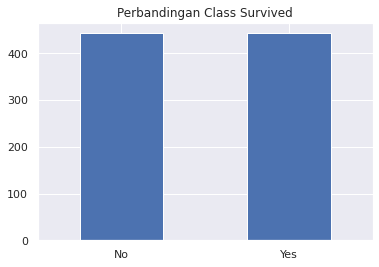

In [ ]:
y_smote.value_counts().plot(kind='bar')
plt.xticks([0,1],['No','Yes'], rotation=0)
plt.title('Perbandingan Class Survived')

Hore!.. Data titanic siap untuk digunakan pada tahap modelling